Exploratory phase

In [39]:
import pandas as pd
df = pd.read_csv('nba_stats_clean.csv')

In [40]:
df.head()

,Anno,Position,id,TEAM,WIN%,3PM,3PA,3P%,FGM,FGA,FG%,AST,BLKA,TOV
0,2023,All,1,Milwaukee Bucks,0.707,14.8,40.3,36.8,42.7,90.4,47.3,25.8,3.9,14.6
1,2023,All,2,Boston Celtics,0.695,16.0,42.6,37.7,42.2,88.8,47.5,26.7,3.9,13.4
2,2023,All,3,Philadelphia 76ers,0.659,12.6,32.6,38.7,40.8,83.8,48.7,25.2,4.6,13.7
3,2023,All,4,Denver Nuggets,0.646,11.8,31.2,37.9,43.6,86.4,50.4,28.9,4.2,14.5
4,2023,All,5,Cleveland Cavaliers,0.622,11.6,31.6,36.7,41.6,85.2,48.8,24.9,4.4,13.3


We only consider positions equal to All

In [41]:
dfAll = df[df['Position'] == 'All']

In [42]:
dfAll.keys()

Index(['Anno', 'Position', 'id', 'TEAM', 'WIN%', '3PM', '3PA', '3P%', 'FGM',
       'FGA', 'FG%', 'AST', 'BLKA', 'TOV'],
      dtype='object')

In [43]:
dfAll.describe()

,Anno,id,WIN%,3PM,3PA,3P%,FGM,FGA,FG%,AST,BLKA,TOV
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,2010.094763,15.069825,0.499810,7.523940,21.105112,35.440025,37.597132,82.805112,45.392145,22.277057,4.904613,14.553117
std,7.770812,8.632466,0.152148,3.025708,8.157111,2.042331,2.554368,4.161876,1.676064,2.238556,0.705350,1.207869
min,1997.000000,1.000000,0.106000,2.000000,7.400000,26.400000,30.800000,71.200000,40.100000,15.600000,3.000000,11.100000
25%,2003.000000,8.000000,0.390000,5.200000,15.000000,34.300000,35.800000,79.700000,44.300000,20.700000,4.400000,13.800000
50%,2010.000000,15.000000,0.512000,6.700000,19.000000,35.400000,37.250000,82.400000,45.400000,22.050000,4.900000,14.500000
75%,2017.000000,22.000000,0.610000,9.700000,26.600000,36.800000,39.200000,85.800000,46.500000,23.700000,5.375000,15.300000
max,2023.000000,30.000000,0.890000,16.700000,45.400000,42.800000,44.700000,94.400000,50.400000,30.400000,6.900000,19.000000


In [44]:
group_counts=dfAll.groupby('Anno').mean()

<ipython-input-44-a5ea94bef7a0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_counts=dfAll.groupby('Anno').mean()


From an initial analysis, we can see that the 3PA has a strong standard deviation, and in general the values from 3-point shots have a very high variance compared to those from the field (in which 3-point shots are also included)

Let's check the teams that won the most and the triples scored

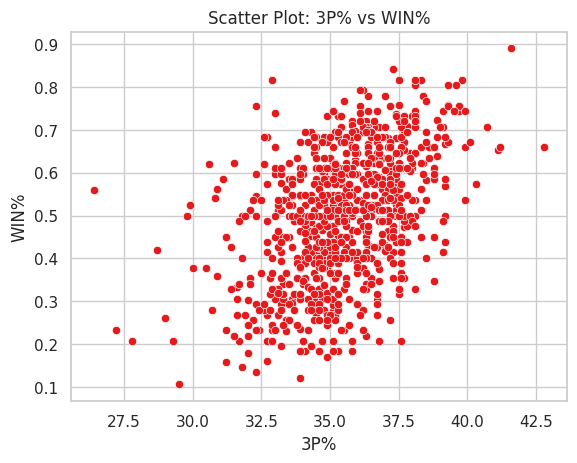

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='3P%', y='WIN%', data=dfAll)
plt.title('Scatter Plot: 3P% vs WIN%')
plt.show()

Improve the plot

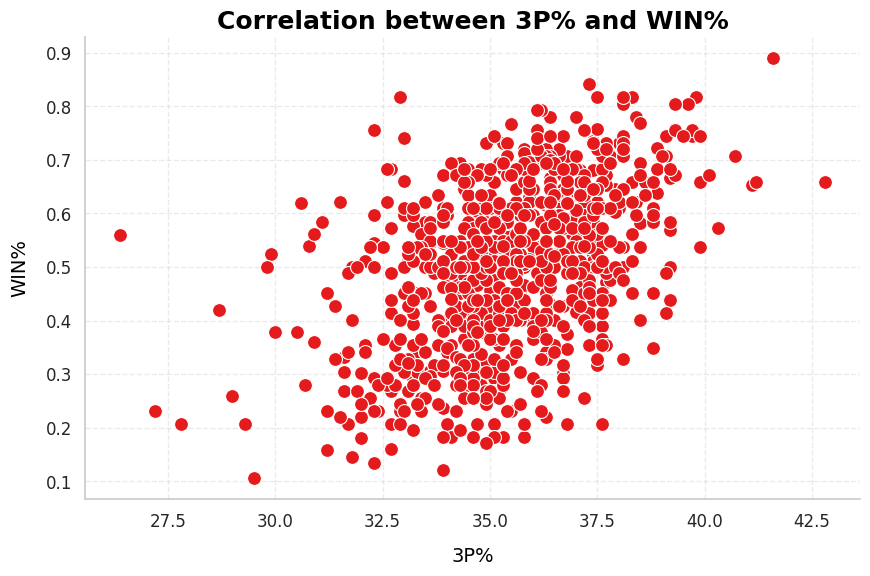

In [46]:

sns.set(style='whitegrid', palette='Set1')

# Scatter plot with enhanced aesthetics
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='3P%', y='WIN%', data=dfAll, s=100, alpha=1, edgecolor='white')

# Title and labels with increased font size
plt.title('Correlation between 3P% and WIN%', fontsize=18, fontweight='bold', color='black')
plt.xlabel('3P%', fontsize=14, labelpad=12, color='black')
plt.ylabel('WIN%', fontsize=14, labelpad=12, color='black')

# Remove spines
sns.despine()

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.4)

# Show the plot
plt.show()

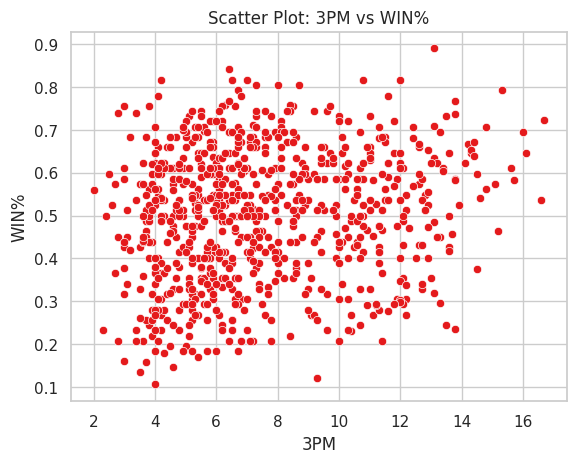

In [47]:
# Scatter plot 3PM
sns.scatterplot(x='3PM', y='WIN%', data=dfAll)
plt.title('Scatter Plot: 3PM vs WIN%')
plt.show()

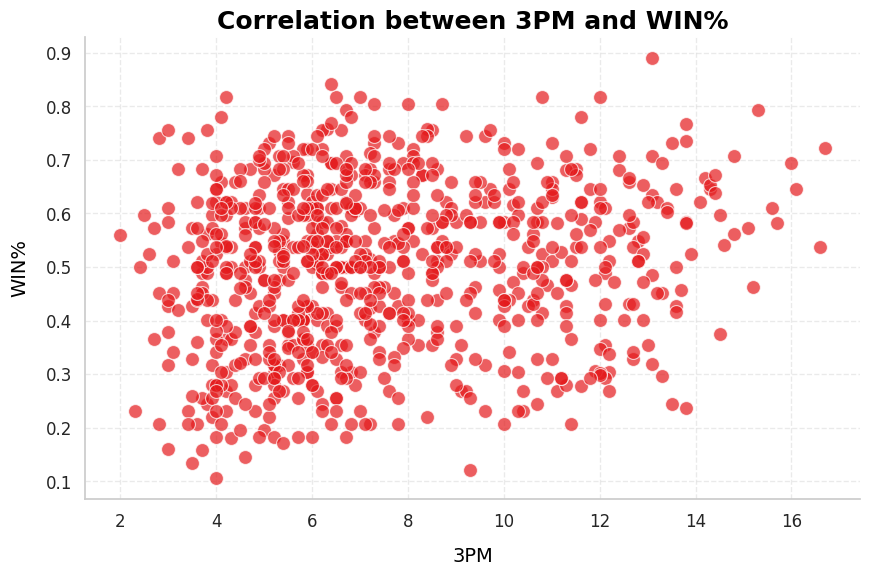

In [48]:
# Set style to whitegrid with a blue color palette
sns.set(style='whitegrid', palette='Set1')

# Scatter plot with enhanced aesthetics
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='3PM', y='WIN%', data=dfAll,  s=100, alpha=0.7, edgecolor='white')

# Title and labels with increased font size and color customization
plt.title('Correlation between 3PM and WIN%', fontsize=18, fontweight='bold', color='black')
plt.xlabel('3PM', fontsize=14, labelpad=12, color='black')
plt.ylabel('WIN%', fontsize=14, labelpad=12, color='black')

# Remove spines
sns.despine()

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.4)

# Show the plot
plt.show()

In [49]:
# Select the best 3PM each season
max_3PM_teams = dfAll.groupby('Anno').apply(lambda x: x.loc[x['3PM'].idxmax()])

print(max_3PM_teams[['Anno', 'id', 'TEAM', '3PM']])

      Anno  id                    TEAM   3PM
Anno                                        
1997  1997   3              Miami Heat   8.3
1998  1998   3     Seattle SuperSonics   7.6
1999  1999   7         Houston Rockets   6.7
2000  2000   3          Indiana Pacers   7.1
2001  2001  20          Boston Celtics   7.2
2002  2002   8          Boston Celtics   8.5
2003  2003  13          Boston Celtics   8.8
2004  2004  18     Seattle SuperSonics   8.8
2005  2005   1            Phoenix Suns   9.7
2006  2006   4            Phoenix Suns  10.2
2007  2007   2            Phoenix Suns   9.6
2008  2008   9           Orlando Magic   9.8
2009  2009   4           Orlando Magic  10.0
2010  2010   2           Orlando Magic  10.3
2011  2011   8           Orlando Magic   9.4
2012  2012  12           Orlando Magic  10.2
2013  2013   7         New York Knicks  10.9
2014  2014   5         Houston Rockets   9.5
2015  2015   3         Houston Rockets  11.4
2016  2016   1   Golden State Warriors  13.1
2017  2017

only in 2004 and 2001 did the team with the highest average of triples scored not make the playoffs (ranked in the top 16)

In [50]:
# Select the best 3P% each season
max_3P_percent_teams = dfAll.groupby('Anno').apply(lambda x: x.loc[x['3P%'].idxmax()])

print(max_3P_percent_teams[['Anno', 'id', 'TEAM', '3P%']])

      Anno  id                   TEAM   3P%
Anno                                       
1997  1997   9      Charlotte Hornets  42.8
1998  1998   3    Seattle SuperSonics  39.5
1999  1999  11        Milwaukee Bucks  37.3
2000  2000   3         Indiana Pacers  39.2
2001  2001   1      San Antonio Spurs  40.7
2002  2002  19     Washington Wizards  38.8
2003  2003  16        Milwaukee Bucks  38.3
2004  2004   5       Sacramento Kings  40.1
2005  2005   1           Phoenix Suns  39.3
2006  2006   4           Phoenix Suns  39.9
2007  2007   2           Phoenix Suns  39.9
2008  2008   6           Phoenix Suns  39.3
2009  2009   3         Boston Celtics  39.7
2010  2010   5           Phoenix Suns  41.2
2011  2011   2      San Antonio Spurs  39.7
2012  2012   1      San Antonio Spurs  39.3
2013  2013  10  Golden State Warriors  40.3
2014  2014   1      San Antonio Spurs  39.7
2015  2015   1  Golden State Warriors  39.8
2016  2016   1  Golden State Warriors  41.6
2017  2017   2      San Antonio 

Except for the 2002 season, all teams with the highest 3P percentage made it to the play-offs (in the top 16)

Focus on the time series

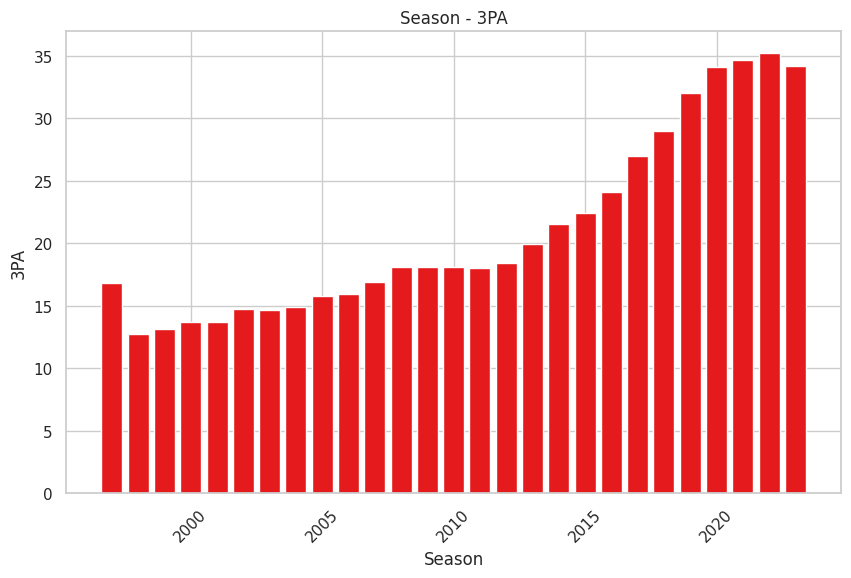

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(group_counts.index, group_counts["3PA"])

plt.xlabel('Season')
plt.ylabel('3PA')
plt.title('Season - 3PA')

plt.xticks(rotation=45)

plt.grid(True)
plt.show()

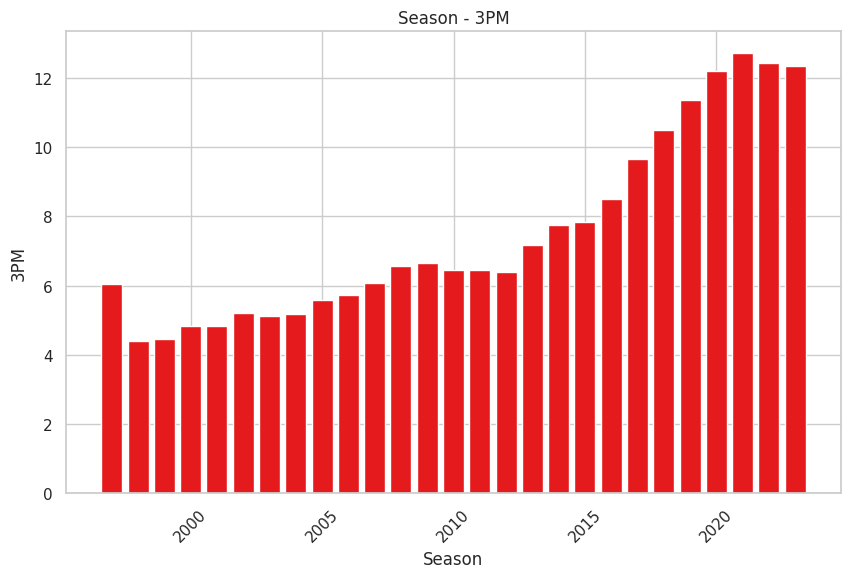

In [52]:

plt.figure(figsize=(10, 6))
plt.bar(group_counts.index, group_counts["3PM"])


plt.xlabel('Season')
plt.ylabel('3PM')
plt.title('Season - 3PM')

plt.xticks(rotation=45)


plt.grid(True)
plt.show()

Why the value in the season 1997 is so high?

Heading into the 1994-95 season, the NBA was faced with a problem; teams weren’t scoring like they used to. The league-wide scoring average from the previous season hit a 35-year low.
Deviating from the high-tempo, fast-paced offenses from the ‘70s and early-’80s where teams often averaged over 100 possessions per game, teams began to play a slower, more deliberate style of offense.
Fast forward to the 1990s, when the Bulls won three-straight titles while averaging less than 95 possessions per game, and teams wanting to replicate this level of success implemented similar offensive schemes and game plans that prioritized getting more efficient shot attempts.
To remedy the lack of scoring, the NBA shortened its three-point line from 23 feet, 9 inches (22 feet at the corners) to an equal 22 feet around the basket.
It did prompt teams to shoot more three-pointers, as the 1994-95 campaign set then-records in league-wide makes, attempts, and efficiency. But it didn’t solve the scoring problem as teams continued to play slower and scoring dipped down to levels the league hadn’t seen since the 1950s. The NBA would return the three-point line back to its original position for good ahead of the 1997-98 season, and it took another 20 years after that for scoring to return to the levels of the ‘70s and ‘80s.

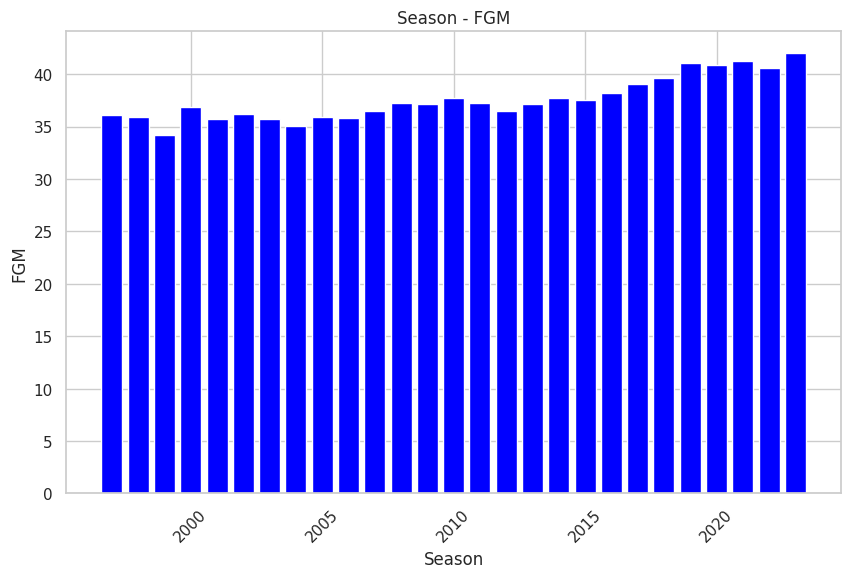

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(group_counts.index, group_counts["FGM"], color="blue")

plt.xlabel('Season')
plt.ylabel('FGM')
plt.title('Season - FGM')

plt.xticks(rotation=45)

plt.grid(True)
plt.show()

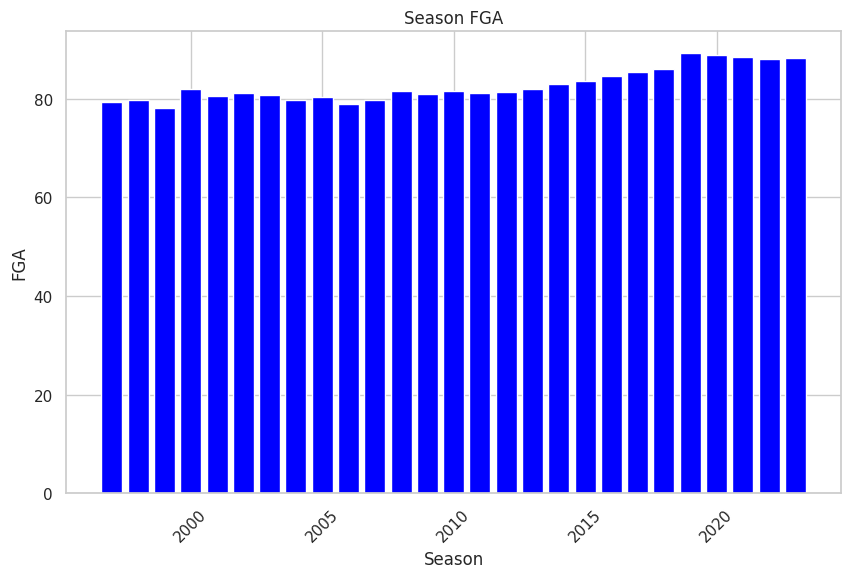

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(group_counts.index, group_counts["FGA"], color="blue")


plt.xlabel('Season')
plt.ylabel('FGA')
plt.title('Season FGA')


plt.xticks(rotation=45)


plt.grid(True)
plt.show()

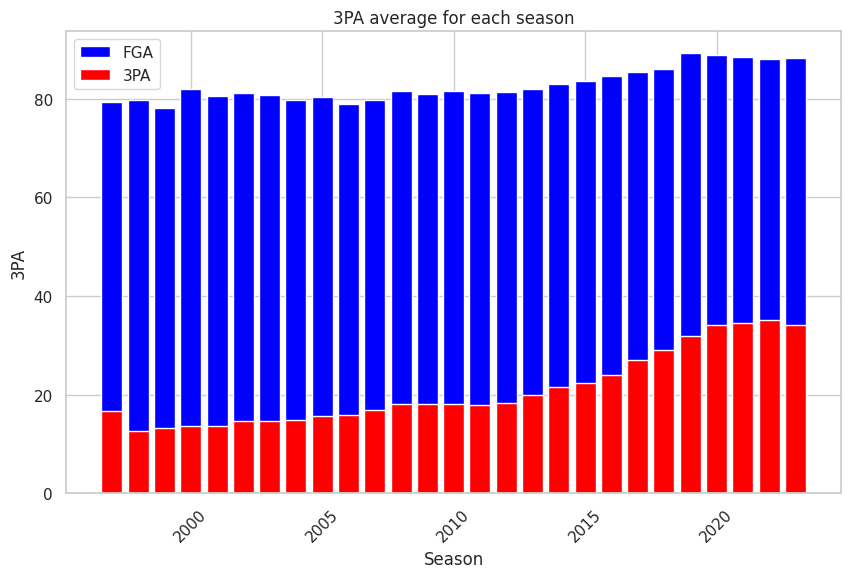

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(group_counts.index, group_counts["FGA"], label="FGA", color='blue')
ax.bar(group_counts.index, group_counts["3PA"], label="3PA", color='red')

ax.set_xlabel('Season')
ax.set_ylabel('3PA')
ax.set_title('3PA average for each season')

ax.tick_params(axis='x', rotation=45)

ax.grid(True)
ax.legend()
plt.show()


<ipython-input-56-52adb3b7c838>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = filtered_df.groupby('Anno').mean()


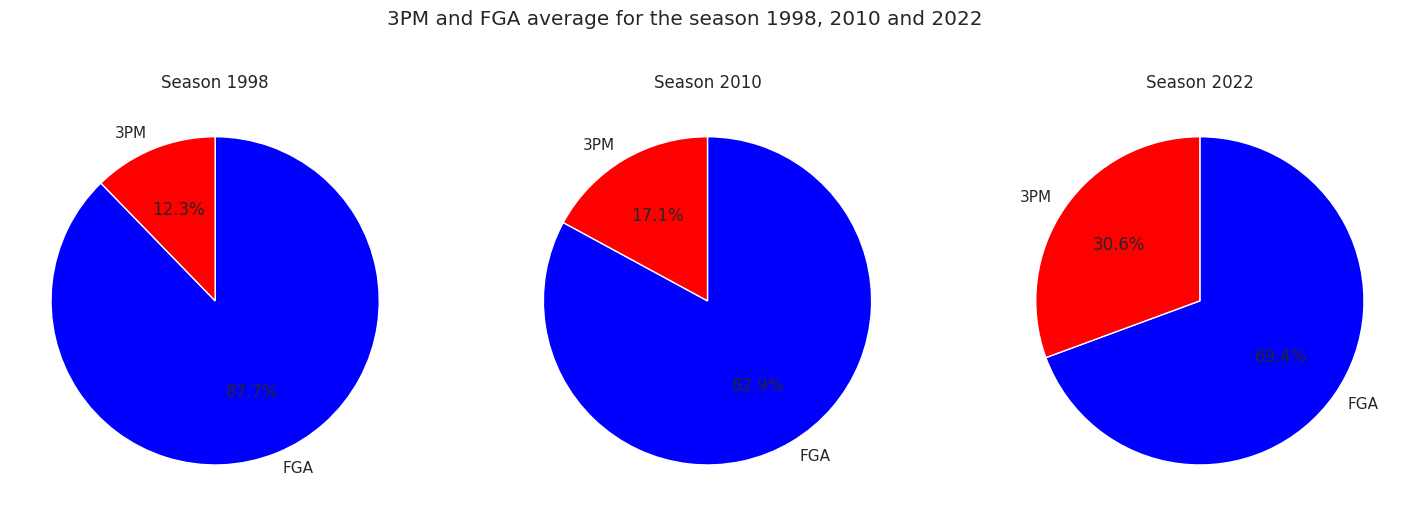

In [56]:
selected_years = [1998, 2010, 2022]
filtered_df = dfAll[dfAll['Anno'].isin(selected_years)]

grouped_df = filtered_df.groupby('Anno').mean()

grouped_df['3PM_mean'] = grouped_df['3PM'] / grouped_df['FGM']

colors = ['blue', 'red']  # Blue for FG, red for 3P

fig, axes = plt.subplots(1, len(grouped_df), figsize=(18, 6), subplot_kw=dict(aspect="equal"))

for i, year in enumerate(grouped_df.index):
    axes[i].pie([1 - grouped_df.loc[year, '3PM_mean'], grouped_df.loc[year, '3PM_mean']],
                labels=['FGA', '3PM'],
                autopct='%1.1f%%',
                startangle=90,
                colors=colors,
                counterclock=False)
    axes[i].set_title(f'Season {year}')

plt.suptitle('3PM and FGA average for the season 1998, 2010 and 2022')
plt.show()




From this graph it is evident how 3-point shooting has increased over the years, but has this happened because actually 3-point shooting allows you to win more?
Let's check the percentages and see how it goes

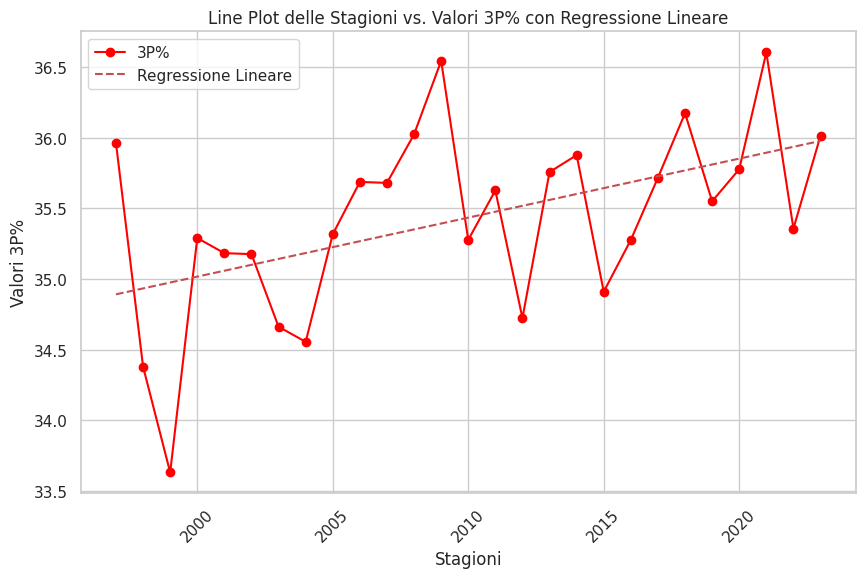

In [63]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10, 6))
plt.plot(group_counts.index, group_counts["3P%"], marker='o', linestyle='-', color='red', label='3P%')

# Linear regression
x = np.array(group_counts.index).reshape(-1, 1)
y = np.array(group_counts["3P%"])
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# Add regression line
plt.plot(group_counts.index, y_pred, linestyle='--', color='r', label='Regressione Lineare')

plt.xlabel('Stagioni')
plt.ylabel('Valori 3P%')
plt.title('Line Plot delle Stagioni vs. Valori 3P% con Regressione Lineare')

plt.xticks(rotation=45)

plt.legend()

plt.grid(True)
plt.show()

Percentuali da 3P in crescita

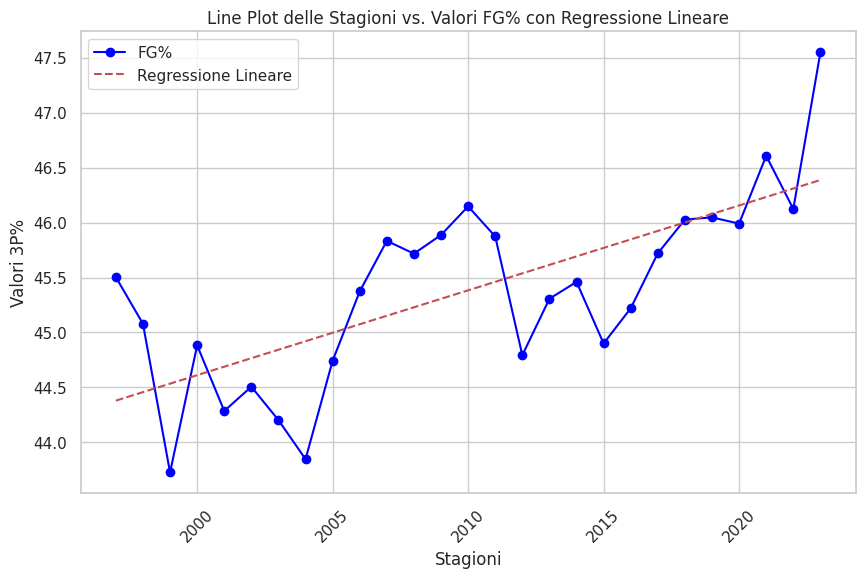

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(group_counts.index, group_counts["FG%"], marker='o', linestyle='-', color='blue', label='FG%')

# Linear regression
x = np.array(group_counts.index).reshape(-1, 1)
y = np.array(group_counts["FG%"])
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)

# Add Linear regression
plt.plot(group_counts.index, y_pred, linestyle='--', color='r', label='Regressione Lineare')

plt.xlabel('Stagioni')
plt.ylabel('Valori 3P%')
plt.title('Line Plot delle Stagioni vs. Valori FG% con Regressione Lineare')

plt.xticks(rotation=45)

plt.legend()

plt.grid(True)
plt.show()

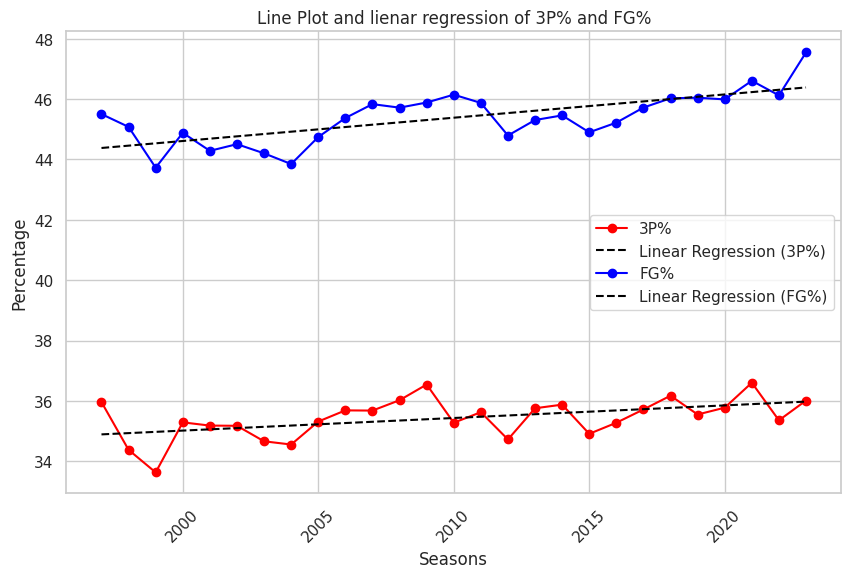

In [59]:
plt.figure(figsize=(10, 6))

# Linear regression and Line plot for 3P%
plt.plot(group_counts.index, group_counts["3P%"], marker='o', linestyle='-', color='red', label='3P%')
x_3p = np.array(group_counts.index).reshape(-1, 1)
y_3p = np.array(group_counts["3P%"])
model_3p = LinearRegression().fit(x_3p, y_3p)
y_pred_3p = model_3p.predict(x_3p)
plt.plot(group_counts.index, y_pred_3p, linestyle='--', color='black', label='Linear Regression (3P%)')

# Linear regression and Line plot for FG%
plt.plot(group_counts.index, group_counts["FG%"], marker='o', linestyle='-', color='blue', label='FG%')
x_fg = np.array(group_counts.index).reshape(-1, 1)
y_fg = np.array(group_counts["FG%"])
model_fg = LinearRegression().fit(x_fg, y_fg)
y_pred_fg = model_fg.predict(x_fg)
plt.plot(group_counts.index, y_pred_fg, linestyle='--', color='black', label='Linear Regression (FG%)')

plt.xlabel('Seasons')
plt.ylabel('Percentage')
plt.title('Line Plot and lienar regression of 3P% and FG%')

plt.xticks(rotation=45)

plt.legend()

plt.grid(True)
plt.show()


It can be seen, as already deduced from the correlations, that it is not so much scoring that matters as being accurate --> scoring triples does not count. With percentages having a constant trend over the years increasing the number of shots (while maintaining the percentages) has certainly led to a higher winning percentage

If the percentages from 3 remain constant it is obvious that you try to shoot more from 3 --> higher frequency (you can make more shots) and are worth more. Obviously basketball is not mathematics, if you shoot a lot of 3's defences adapt and force you to lower your percentages. But surely this strong relationship explains a lot about how the game has changed over the years